In [32]:
import re 
import pandas as pd

f = open(r'WhatsApp_Chat_with_3rd_yr_AIML_SEC_B_Student_official_group\WhatsApp Chat with 3rd yrAIMLSEC-B Student official group.txt', 'r', encoding='utf-8')
data = f.read()
print(data)

13/07/23, 5:43 pm - Messages and calls are end-to-end encrypted. Only people in this chat can read, listen to, or share them. Learn more.
13/07/23, 5:41 pm - Geetanjali Tyagi Mam created group "2nd Year official Ai/ML B section Group"
13/07/23, 5:43 pm - You joined using this group's invite link
13/07/23, 5:43 pm - The message timer was updated. New messages will disappear from this chat 90 days after they're sent, except when kept
13/07/23, 5:43 pm - Kunal Kohli joined using this group's invite link
13/07/23, 5:45 pm - Rohit Chaudhary joined using this group's invite link
13/07/23, 5:45 pm - Ayush joined using this group's invite link
13/07/23, 5:46 pm - Krishna Supermacy joined using this group's invite link
13/07/23, 5:46 pm - Khushi joined using this group's invite link
13/07/23, 5:46 pm - Aditya Singh joined using this group's invite link
13/07/23, 5:47 pm - Aaditya Tyagi joined using this group's invite link
13/07/23, 5:48 pm - +91 70788 23569 joined using this group's invite lin

In [33]:
data = data.replace('\u202f', ' ')
data = data.replace('\n', '')

In [34]:
# /d for digits, {1,2} for 1 or 2 digits, /s for space, - for hyphen
# The pattern matches the date and time format in the WhatsApp chat export
# pattern = r'\d{1,2}/\d{1,2}/\d{2,4}, \s\d{1,2}:\d{2}\s-\s'
# pattern = r'\d{1,2}/\d{1,2}/\d{2,4}, \s\d{1,2}:\d{2}\s-\s'
# pattern = r'^\d{1,2}/\d{1,2}/\d{2,4}, \d{1,2}:\d{2} [ap]m -'
# pattern  = r'^\d{2}/\d{2}/\d{2,4}, \d{1,2}:\d{2}\s?[ap]m -'
# pattern = r'^\d{1,2}/\d{1,2}/\d{2,4}, \d{1,2}:\d{2}\s?[ap]m -'
pattern = r'\d{2}/\d{2}/\d{2}, \d{1,2}:\d{2}\s?[ap]m -'


In [84]:
messages = re.split(pattern, data)[1:]
messages = [msg.lstrip() for msg in messages if msg.lstrip()]
print(messages)
# print(*messages, sep='\n')

['Messages and calls are end-to-end encrypted. Only people in this chat can read, listen to, or share them. Learn more.', 'Geetanjali Tyagi Mam created group "2nd Year official Ai/ML B section Group"', "You joined using this group's invite link", "The message timer was updated. New messages will disappear from this chat 90 days after they're sent, except when kept", "Kunal Kohli joined using this group's invite link", "Rohit Chaudhary joined using this group's invite link", "Ayush joined using this group's invite link", "Krishna Supermacy joined using this group's invite link", "Khushi joined using this group's invite link", "Aditya Singh joined using this group's invite link", "Aaditya Tyagi joined using this group's invite link", "+91 70788 23569 joined using this group's invite link", "Aarush Garg joined using this group's invite link", "Ekansh Prasad joined using this group's invite link", "+91 72063 87302 joined using this group's invite link", "Aayushi joined using this group's i

In [36]:
dates = re.findall(pattern, data)
print(dates)

['13/07/23, 5:43 pm -', '13/07/23, 5:41 pm -', '13/07/23, 5:43 pm -', '13/07/23, 5:43 pm -', '13/07/23, 5:43 pm -', '13/07/23, 5:45 pm -', '13/07/23, 5:45 pm -', '13/07/23, 5:46 pm -', '13/07/23, 5:46 pm -', '13/07/23, 5:46 pm -', '13/07/23, 5:47 pm -', '13/07/23, 5:48 pm -', '13/07/23, 5:48 pm -', '13/07/23, 5:48 pm -', '13/07/23, 5:48 pm -', '13/07/23, 5:49 pm -', '13/07/23, 5:51 pm -', '13/07/23, 5:51 pm -', '13/07/23, 5:52 pm -', '13/07/23, 5:52 pm -', '13/07/23, 5:52 pm -', '13/07/23, 5:53 pm -', '13/07/23, 5:53 pm -', '13/07/23, 5:53 pm -', '13/07/23, 5:53 pm -', '13/07/23, 5:54 pm -', '13/07/23, 5:56 pm -', '13/07/23, 5:59 pm -', '13/07/23, 6:00 pm -', '13/07/23, 6:01 pm -', '13/07/23, 6:01 pm -', '13/07/23, 6:03 pm -', '13/07/23, 6:08 pm -', '13/07/23, 6:08 pm -', '13/07/23, 6:10 pm -', '13/07/23, 6:12 pm -', '13/07/23, 6:13 pm -', '13/07/23, 6:14 pm -', '13/07/23, 6:16 pm -', '13/07/23, 6:21 pm -', '13/07/23, 6:23 pm -', '13/07/23, 6:26 pm -', '13/07/23, 6:32 pm -', '13/07/23,

In [37]:
df = pd.DataFrame({'Date': dates, 'Message': messages})
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%y, %I:%M %p -')
df.head()

,Date,Message
0,2023-07-13 17:43:00,Messages and calls are end-to-end encrypted. ...
1,2023-07-13 17:41:00,"Geetanjali Tyagi Mam created group ""2nd Year ..."
2,2023-07-13 17:43:00,You joined using this group's invite link
3,2023-07-13 17:43:00,The message timer was updated. New messages w...
4,2023-07-13 17:43:00,Kunal Kohli joined using this group's invite ...


In [38]:
df.shape

(3497, 2)

In [39]:
# Separate users and messages
# df['User'] = df['Message'].str.split(':').str[0]
users = []
messages = []
for message in df['Message']:
    entry = re.split(r'([\w\W]+?):\s', message, maxsplit=1)
    if entry[1:]: # user name
        users.append(entry[1])
        messages.append(entry[2])
    else:
        users.append('Group Notification')
        messages.append(entry[0])
    
df['user'] = users
df['message'] = messages
df.drop(columns=['Message'], inplace=True)

In [40]:
df.sample(10)

,Date,user,message
837,2023-11-13 10:02:00,Geetanjali Tyagi Mam,<Media omitted>
1080,2024-01-08 06:41:00,Shivani Tyagi Mam,"Dear CMs, Kindly share the below link of regis..."
3171,2025-03-06 09:40:00,+91 93550 62815,Reminder
1951,2024-04-27 08:59:00,Manan Aggarwal,Done sir
2313,2024-08-13 14:54:00,Shivani Tyagi Mam,IMG-20240812-WA0006.jpg (file attached)📢 *Atte...
61,2023-07-14 18:25:00,Geetanjali Tyagi Mam,Dear Students *The registration ...
3467,2025-06-27 10:48:00,Akanksha Bisht Mam,Dear studentsKindly fill this google form.
2516,2024-09-30 09:31:00,Geetanjali Mam 2,<Media omitted>
2322,2024-08-16 17:59:00,Manvender,I have already submitted my fees maam
1162,2024-01-15 23:25:00,Saksham Bharadwaj,Verified


In [41]:
df['Year'] = df['Date'].dt.year

In [42]:
df.head()

,Date,user,message,Year
0,2023-07-13 17:43:00,Group Notification,Messages and calls are end-to-end encrypted. ...,2023
1,2023-07-13 17:41:00,Group Notification,"Geetanjali Tyagi Mam created group ""2nd Year ...",2023
2,2023-07-13 17:43:00,Group Notification,You joined using this group's invite link,2023
3,2023-07-13 17:43:00,Group Notification,The message timer was updated. New messages w...,2023
4,2023-07-13 17:43:00,Group Notification,Kunal Kohli joined using this group's invite ...,2023


In [43]:
df['Month'] = df['Date'].dt.month_name()

In [44]:
df['Day'] = df['Date'].dt.day_name()

In [45]:
df['Hour'] = df['Date'].dt.hour

In [46]:
df['Minute'] = df['Date'].dt.minute

In [47]:
df.head()

,Date,user,message,Year,Month,Day,Hour,Minute
0,2023-07-13 17:43:00,Group Notification,Messages and calls are end-to-end encrypted. ...,2023,July,Thursday,17,43
1,2023-07-13 17:41:00,Group Notification,"Geetanjali Tyagi Mam created group ""2nd Year ...",2023,July,Thursday,17,41
2,2023-07-13 17:43:00,Group Notification,You joined using this group's invite link,2023,July,Thursday,17,43
3,2023-07-13 17:43:00,Group Notification,The message timer was updated. New messages w...,2023,July,Thursday,17,43
4,2023-07-13 17:43:00,Group Notification,Kunal Kohli joined using this group's invite ...,2023,July,Thursday,17,43


In [48]:
df[df['user'] == 'Manan Aggarwal']

,Date,user,message,Year,Month,Day,Hour,Minute


In [49]:
df[df['user'] == 'Manan Aggarwal'].shape[0]

0

In [50]:
for message in df['message']:
    print(message.split(' '))

['', 'Messages', 'and', 'calls', 'are', 'end-to-end', 'encrypted.', 'Only', 'people', 'in', 'this', 'chat', 'can', 'read,', 'listen', 'to,', 'or', 'share', 'them.', 'Learn', 'more.']
['', 'Geetanjali', 'Tyagi', 'Mam', 'created', 'group', '"2nd', 'Year', 'official', 'Ai/ML', 'B', 'section', 'Group"']
['', 'You', 'joined', 'using', 'this', "group's", 'invite', 'link']
['', 'The', 'message', 'timer', 'was', 'updated.', 'New', 'messages', 'will', 'disappear', 'from', 'this', 'chat', '90', 'days', 'after', "they're", 'sent,', 'except', 'when', 'kept']
['', 'Kunal', 'Kohli', 'joined', 'using', 'this', "group's", 'invite', 'link']
['', 'Rohit', 'Chaudhary', 'joined', 'using', 'this', "group's", 'invite', 'link']
['', 'Ayush', 'joined', 'using', 'this', "group's", 'invite', 'link']
['', 'Krishna', 'Supermacy', 'joined', 'using', 'this', "group's", 'invite', 'link']
['', 'Khushi', 'joined', 'using', 'this', "group's", 'invite', 'link']
['', 'Aditya', 'Singh', 'joined', 'using', 'this', "group's

In [51]:
words = []
for message in df['message']:
    words.extend(message.split(' '))    # add list into words list

In [52]:
len(words)

48569

In [53]:
df[df['message'] == '<Media omitted>'].shape[0]

176

In [54]:
df['message'].str.contains('media omitted', case=False, na=False).sum()

439

In [55]:
# To extract url from a message
from urlextract import URLExtract
extractor = URLExtract()
urls = extractor.find_urls("Let's www.gmail.com have url stackoverflow.com as an example google.com, http://facebook.com, ftp://url.in")
urls

['www.gmail.com',
 'stackoverflow.com',
 'google.com',
 'http://facebook.com',
 'ftp://url.in']

In [56]:
links = []
for message in df['message']:
    links.extend(extractor.find_urls(message))
print(links)

['B.Tech', 'M.Tech', 'https://drive.google.com/drive/folders/1ODOXGEy5Pu3f9sEhLGCo080nNDyAsbvB?usp=sharing', 'students-https://sp.srmist.edu.in/srmiststudentportal/students/loginManager/youLogin.jsp', 'https://sp.srmist.edu.in/srmiststudentportal/students/loginManager/youLogin.jsp', 'https://drive.google.com/drive/folders/1ODOXGEy5Pu3f9sEhLGCo080nNDyAsbvB?usp=sharing', 'https://classroom.google.com/c/NjE2MjcxMTgyMjU4?cjc=ftijzdg', 'https://classroom.google.com/c/NjE2MzgxMDc4MjIw?cjc=boitkw7', 'https://chat.whatsapp.com/IQ7FJ5VvREE20USUryeA96', 'https://evarsity.srmist.edu.in/srmsip/', 'binding.No', 'https://docs.google.com/forms/d/e/1FAIpQLSd7cWdaPJl05rtARAsqI_-DUjfPOVr3i2pvYcbBtn9aAuCXtw/viewform?usp=sf_link', 'https://docs.google.com/forms/d/e/1FAIpQLSd7cWdaPJl05rtARAsqI_-DUjfPOVr3i2pvYcbBtn9aAuCXtw/viewform?usp=sf_link', 'www.antiragging.in', 'https://www.antiragging.in/Site/Affidavits_Registration.aspxWhile', 'Campus.College', 'https://chat.whatsapp.com/EpFUBMt7lcOH7iyCldyi6D', 'ht

In [57]:
links = []
for message in df['message']:
    msg = extractor.find_urls(message)
    if msg == 'B.Tech' or msg == 'M.Tech':
        continue
    else:
        links.extend(msg)
print(links)

# for i in range(len(df)):
#     if df[i] == 'B.Tech' or df[i] == 'M.Tech.':
#         df.pop(i, inplace=True)


['B.Tech', 'M.Tech', 'https://drive.google.com/drive/folders/1ODOXGEy5Pu3f9sEhLGCo080nNDyAsbvB?usp=sharing', 'students-https://sp.srmist.edu.in/srmiststudentportal/students/loginManager/youLogin.jsp', 'https://sp.srmist.edu.in/srmiststudentportal/students/loginManager/youLogin.jsp', 'https://drive.google.com/drive/folders/1ODOXGEy5Pu3f9sEhLGCo080nNDyAsbvB?usp=sharing', 'https://classroom.google.com/c/NjE2MjcxMTgyMjU4?cjc=ftijzdg', 'https://classroom.google.com/c/NjE2MzgxMDc4MjIw?cjc=boitkw7', 'https://chat.whatsapp.com/IQ7FJ5VvREE20USUryeA96', 'https://evarsity.srmist.edu.in/srmsip/', 'binding.No', 'https://docs.google.com/forms/d/e/1FAIpQLSd7cWdaPJl05rtARAsqI_-DUjfPOVr3i2pvYcbBtn9aAuCXtw/viewform?usp=sf_link', 'https://docs.google.com/forms/d/e/1FAIpQLSd7cWdaPJl05rtARAsqI_-DUjfPOVr3i2pvYcbBtn9aAuCXtw/viewform?usp=sf_link', 'www.antiragging.in', 'https://www.antiragging.in/Site/Affidavits_Registration.aspxWhile', 'Campus.College', 'https://chat.whatsapp.com/EpFUBMt7lcOH7iyCldyi6D', 'ht

In [58]:
links = []
for message in df['message']:
    # links.extend(exctract.find_urls(message))
    found_links = extractor.find_urls(message)
    # Exclude links containing 'B.Tech' or 'M.Tech'
    filtered_links = [link for link in found_links if 'B.Tech' not in link and 'M.Tech' not in link]
    links.extend(filtered_links)
print(links)


['https://drive.google.com/drive/folders/1ODOXGEy5Pu3f9sEhLGCo080nNDyAsbvB?usp=sharing', 'students-https://sp.srmist.edu.in/srmiststudentportal/students/loginManager/youLogin.jsp', 'https://sp.srmist.edu.in/srmiststudentportal/students/loginManager/youLogin.jsp', 'https://drive.google.com/drive/folders/1ODOXGEy5Pu3f9sEhLGCo080nNDyAsbvB?usp=sharing', 'https://classroom.google.com/c/NjE2MjcxMTgyMjU4?cjc=ftijzdg', 'https://classroom.google.com/c/NjE2MzgxMDc4MjIw?cjc=boitkw7', 'https://chat.whatsapp.com/IQ7FJ5VvREE20USUryeA96', 'https://evarsity.srmist.edu.in/srmsip/', 'binding.No', 'https://docs.google.com/forms/d/e/1FAIpQLSd7cWdaPJl05rtARAsqI_-DUjfPOVr3i2pvYcbBtn9aAuCXtw/viewform?usp=sf_link', 'https://docs.google.com/forms/d/e/1FAIpQLSd7cWdaPJl05rtARAsqI_-DUjfPOVr3i2pvYcbBtn9aAuCXtw/viewform?usp=sf_link', 'www.antiragging.in', 'https://www.antiragging.in/Site/Affidavits_Registration.aspxWhile', 'Campus.College', 'https://chat.whatsapp.com/EpFUBMt7lcOH7iyCldyi6D', 'https://forms.gle/zyWi

In [59]:
# Most busy user
# most_busy_user = df['user'].value_counts().idxmax()
x = df['user'].value_counts().head(5)
print(x)
print(type(x))

user
 Shivani Tyagi Mam       398
 Geetanjali Tyagi Mam    379
 Geetanjali Mam 2        243
 Akanksha Bisht Mam      174
Group Notification       159
Name: count, dtype: int64
<class 'pandas.core.series.Series'>


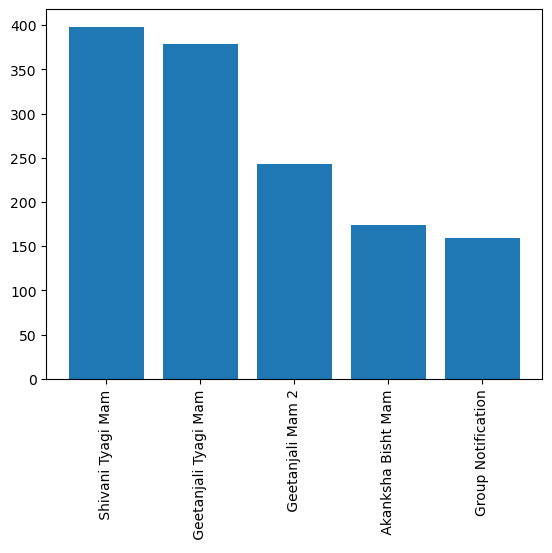

In [60]:
import matplotlib.pyplot as plt
name = x.index
count = x.values
plt.bar(name, count)
plt.xticks(rotation='vertical')     # 90
plt.show()

In [61]:
round((df['user'].value_counts()/df.shape[0]) * 100, 2).reset_index().rename(columns={'user': 'Name', 'count': 'Percentage'})

,Name,Percentage
0,Shivani Tyagi Mam,11.38
1,Geetanjali Tyagi Mam,10.84
2,Geetanjali Mam 2,6.95
3,Akanksha Bisht Mam,4.98
4,Group Notification,4.55
...,...,...
89,Saaransh,0.06
90,Harendra Sharma Sir,0.06
91,Satish Sir,0.06
92,Ashwani Sir (PPS),0.03


In [62]:
# remove group notification in top 10 msg
temp = df[df['user'] != 'Group Notification']

# remove media omitted messages
temp = temp[temp['message'] != '<Media omitted>']

temp

,Date,user,message,Year,Month,Day,Hour,Minute
58,2023-07-14 12:17:00,Geetanjali Tyagi Mam,"<Media omitted>REVISED B.Tech Odd Sem-2023-24,...",2023,July,Friday,12,17
59,2023-07-14 18:23:00,Geetanjali Tyagi Mam,<Media omitted>COURSE REGISTRATION FORM.xlsx,2023,July,Friday,18,23
60,2023-07-14 18:24:00,Geetanjali Tyagi Mam,This message was deleted,2023,July,Friday,18,24
61,2023-07-14 18:25:00,Geetanjali Tyagi Mam,Dear Students *The registration ...,2023,July,Friday,18,25
62,2023-07-14 18:25:00,Geetanjali Tyagi Mam,👆,2023,July,Friday,18,25
...,...,...,...,...,...,...,...,...
3492,2025-07-03 13:47:00,Priyansh Singhvi,Attending Priyansh RA2211026030070AIML 2,2025,July,Thursday,13,47
3493,2025-07-03 13:48:00,+91 94512 00497,Aarsh singh sisodia RA2211026030071Attending,2025,July,Thursday,13,48
3494,2025-07-03 14:01:00,Ekansh Prasad,Ekansh PrasadRA2211026030100MERN 1Attending,2025,July,Thursday,14,1
3495,2025-07-04 08:40:00,Rohit,Rohit KumarRA2211026030103AIML 2Attending,2025,July,Friday,8,40


In [63]:
# remove stop words
# from nltk.corpus import stopwords (we can also use this)

f = open(r'stop_words.txt', 'r', encoding='utf-8')
stopwords = f.read()
print(stopwords)

.
?
-
&
(
)
{
}
[
]
<
>
i
me
my
myself
we
our
ours
ourselves
you
your
yours
yourself
yourselves
he
him
his
himself
she
her
hers
herself
it
its
itself
they
them
their
theirs
themselves
what
which
who
whom
this
that
these
those
am
is
are
was
were
be
been
being
have
has
had
having
do
does
did
doing
a
an
the
and
but
if
or
because
as
until
while
of
at
by
for
with
about
against
between
into
through
during
before
after
above
below
to
from
up
down
in
out
on
off
over
under
again
further
then
once
here
there
when
where
why
how
all
any
both
each
few
more
most
other
some
such
no
nor
not
only
own
same
so
than
too
very
s
t
can
will
just
don
should
now
ka
ke
ki
ko


In [64]:
words = []
for message in temp['message']:
    for word in message.lower().split():  # split the message into words
        if word not in stopwords and word != '<media' and word != 'omitted>revised':
            words.append(word)  # add list into words list

In [65]:
words

['b.tech',
 'odd',
 'sem-2023-24,',
 'acedemic',
 'schedule',
 'b.',
 'tech',
 'm.tech',
 'ncr',
 'campus',
 '(1)',
 'omitted>course',
 'registration',
 'form.xlsx',
 'message',
 'deleted',
 'dear',
 'students',
 '*the',
 'registration',
 'form',
 'needs',
 'filled',
 '15-07-2023.',
 'file',
 'name',
 'changed',
 'saved',
 'full',
 'name',
 'registration',
 'number:',
 'upload',
 'file',
 'here.*',
 'https://drive.google.com/drive/folders/1odoxgey5pu3f9sehlgco080nndyasbvb?usp=sharing',
 '👆',
 'please',
 'srm',
 'uploading',
 'form..',
 'gentle',
 'reminder',
 'kindly',
 'send',
 'within',
 'hour',
 'academic',
 'session',
 '23-24',
 'going',
 'commence',
 'next',
 'couple',
 'days,',
 'transport',
 'services',
 'shall',
 'prime',
 'requirement',
 'students.therefore',
 'class',
 'mentors',
 'requested',
 'share',
 'mentioned',
 'transport',
 'fee',
 'payment',
 'link',
 'students-https://sp.srmist.edu.in/srmiststudentportal/students/loginmanager/youlogin.jsp',
 'https://sp.srmist.edu.i

In [66]:
from collections import Counter
counter = Counter(words)
#counter.pop('<media')  # remove media word exists
df_counter = pd.DataFrame(counter.most_common(20))
df_counter.index = df_counter.index + 1  # Start index from 1
df_counter

,0,1
1,students,411
2,(file,394
3,od,298
4,dear,269
5,message,252
6,done,206
7,please,195
8,deleted,186
9,attached),145
10,form,142


In [67]:
import emoji
emoji_list = []
for message in df['message']:
    for char in message:
        if char in emoji.EMOJI_DATA:
            emoji_list.append(char)

In [68]:
pd.DataFrame(Counter(emoji_list).most_common(len(Counter(emoji_list))))

,0,1
0,✨,54
1,🚀,50
2,🌟,39
3,📍,30
4,📅,28
...,...,...
145,🍛,1
146,👗,1
147,⏳,1
148,🕧,1


In [69]:
# Timelines

df['month_num'] = df['Date'].dt.month
timeline = df.groupby(['Year', 'month_num','Month']).count()['message'].reset_index()
timeline

,Year,month_num,Month,message
0,2023,7,July,131
1,2023,8,August,255
2,2023,9,September,122
3,2023,10,October,272
4,2023,11,November,195
5,2023,12,December,99
6,2024,1,January,127
7,2024,2,February,212
8,2024,3,March,255
9,2024,4,April,320


In [70]:
time = []
for i in range(timeline.shape[0]):
    time.append(timeline['Month'][i] + "-" + str(timeline['Year'][i]))

timeline['time'] = time
timeline

,Year,month_num,Month,message,time
0,2023,7,July,131,July-2023
1,2023,8,August,255,August-2023
2,2023,9,September,122,September-2023
3,2023,10,October,272,October-2023
4,2023,11,November,195,November-2023
5,2023,12,December,99,December-2023
6,2024,1,January,127,January-2024
7,2024,2,February,212,February-2024
8,2024,3,March,255,March-2024
9,2024,4,April,320,April-2024


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24],
 [Text(0, 0, 'July-2023'),
  Text(1, 0, 'August-2023'),
  Text(2, 0, 'September-2023'),
  Text(3, 0, 'October-2023'),
  Text(4, 0, 'November-2023'),
  Text(5, 0, 'December-2023'),
  Text(6, 0, 'January-2024'),
  Text(7, 0, 'February-2024'),
  Text(8, 0, 'March-2024'),
  Text(9, 0, 'April-2024'),
  Text(10, 0, 'May-2024'),
  Text(11, 0, 'June-2024'),
  Text(12, 0, 'July-2024'),
  Text(13, 0, 'August-2024'),
  Text(14, 0, 'September-2024'),
  Text(15, 0, 'October-2024'),
  Text(16, 0, 'November-2024'),
  Text(17, 0, 'December-2024'),
  Text(18, 0, 'January-2025'),
  Text(19, 0, 'February-2025'),
  Text(20, 0, 'March-2025'),
  Text(21, 0, 'April-2025'),
  Text(22, 0, 'May-2025'),
  Text(23, 0, 'June-2025'),
  Text(24, 0, 'July-2025')])

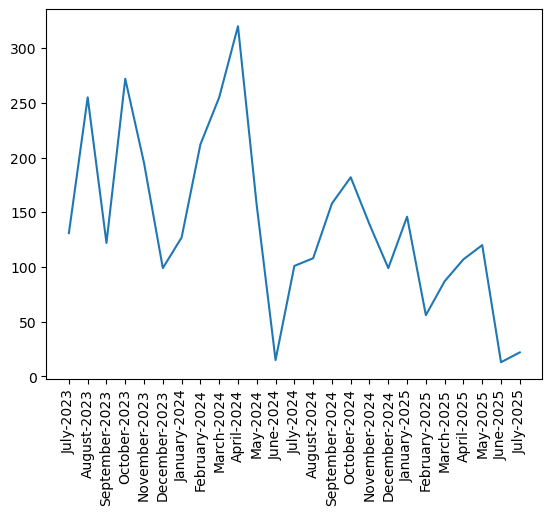

In [71]:
plt.plot(timeline['time'], timeline['message'])
plt.xticks(rotation='vertical')

In [72]:
# This column contains both date and time
df['Date']

0      2023-07-13 17:43:00
1      2023-07-13 17:41:00
2      2023-07-13 17:43:00
3      2023-07-13 17:43:00
4      2023-07-13 17:43:00
               ...        
3492   2025-07-03 13:47:00
3493   2025-07-03 13:48:00
3494   2025-07-03 14:01:00
3495   2025-07-04 08:40:00
3496   2025-07-05 17:18:00
Name: Date, Length: 3497, dtype: datetime64[ns]

In [73]:
# we need only dates here
df['Only_date'] = df['Date'].dt.date
df['Only_date']

0       2023-07-13
1       2023-07-13
2       2023-07-13
3       2023-07-13
4       2023-07-13
           ...    
3492    2025-07-03
3493    2025-07-03
3494    2025-07-03
3495    2025-07-04
3496    2025-07-05
Name: Only_date, Length: 3497, dtype: object

In [74]:
daily_timeline = df.groupby('Only_date').count()['message'].reset_index()

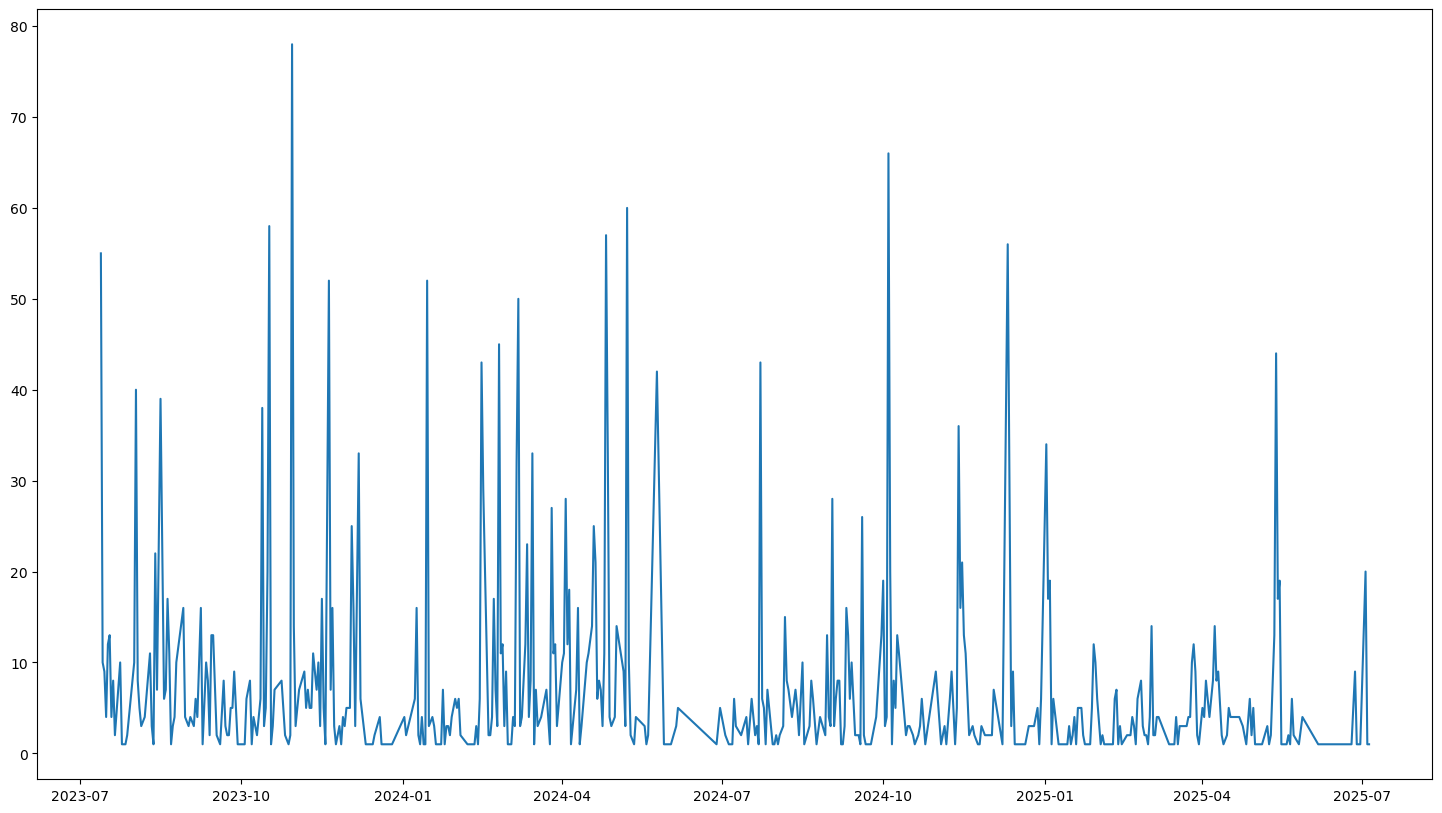

In [75]:
plt.figure(figsize=(18, 10))
plt.plot(daily_timeline['Only_date'], daily_timeline['message'])


In [76]:
# Weekly activity
df['Day_name'] = df['Date'].dt.day_name()
df['Day_name'].value_counts()

Day_name
Thursday     690
Wednesday    597
Friday       577
Monday       564
Tuesday      560
Saturday     301
Sunday       208
Name: count, dtype: int64

In [77]:
# Heat map
period = []
for hour in df[['Day_name', 'Hour']]['Hour']:
    
    if hour == 23:
        period.append(str(hour) + "-" + str('00'))
    elif hour == 0:
        period.append(str('00') + "-" + str(hour+1))
    else:
        period.append(str(hour) + "-" + str(hour+1))


In [78]:
df['period'] = period

In [79]:
df.sample(5)

,Date,user,message,Year,Month,Day,Hour,Minute,month_num,Only_date,Day_name,period
2563,2024-10-04 19:52:00,Shivani Tyagi Mam,<Media omitted>,2024,October,Friday,19,52,10,2024-10-04,Friday,19-20
1081,2024-01-08 06:41:00,Shivani Tyagi Mam,Dear students kindly fill registration form it...,2024,January,Monday,6,41,1,2024-01-08,Monday,6-7
814,2023-11-08 22:45:00,Om Ashrit Patel,Exam fee paid : RA2211026030067,2023,November,Wednesday,22,45,11,2023-11-08,Wednesday,22-23
363,2023-08-25 15:25:00,Shivani Tyagi Mam,"69,73,76,81,83,88,89,94,96,98,106,111,112,120,...",2023,August,Friday,15,25,8,2023-08-25,Friday,15-16
2939,2024-12-29 16:04:00,Akanksha Bisht Mam,"Dear students, please acknowledge in the group...",2024,December,Sunday,16,4,12,2024-12-29,Sunday,16-17


In [80]:
df.head()

,Date,user,message,Year,Month,Day,Hour,Minute,month_num,Only_date,Day_name,period
0,2023-07-13 17:43:00,Group Notification,Messages and calls are end-to-end encrypted. ...,2023,July,Thursday,17,43,7,2023-07-13,Thursday,17-18
1,2023-07-13 17:41:00,Group Notification,"Geetanjali Tyagi Mam created group ""2nd Year ...",2023,July,Thursday,17,41,7,2023-07-13,Thursday,17-18
2,2023-07-13 17:43:00,Group Notification,You joined using this group's invite link,2023,July,Thursday,17,43,7,2023-07-13,Thursday,17-18
3,2023-07-13 17:43:00,Group Notification,The message timer was updated. New messages w...,2023,July,Thursday,17,43,7,2023-07-13,Thursday,17-18
4,2023-07-13 17:43:00,Group Notification,Kunal Kohli joined using this group's invite ...,2023,July,Thursday,17,43,7,2023-07-13,Thursday,17-18


In [81]:
'''import seaborn as sns
plt.figure(figsize=(20,6))
# sns.heatmap(df.pivot_table(index='Day_name', columns='period', values='message', aggfunc='count').fillna(0).sort())
pivot = df.pivot_table(index='Day_name', columns='period', values='message', aggfunc='count').fillna(0)
pivot = pivot.reindex(sorted(pivot.columns), axis=1)  # Sort columns alphabetically
sns.heatmap(pivot)
plt.yticks(rotation = 'horizontal')
plt.show()'''


"import seaborn as sns\nplt.figure(figsize=(20,6))\n# sns.heatmap(df.pivot_table(index='Day_name', columns='period', values='message', aggfunc='count').fillna(0).sort())\npivot = df.pivot_table(index='Day_name', columns='period', values='message', aggfunc='count').fillna(0)\npivot = pivot.reindex(sorted(pivot.columns), axis=1)  # Sort columns alphabetically\nsns.heatmap(pivot)\nplt.yticks(rotation = 'horizontal')\nplt.show()"

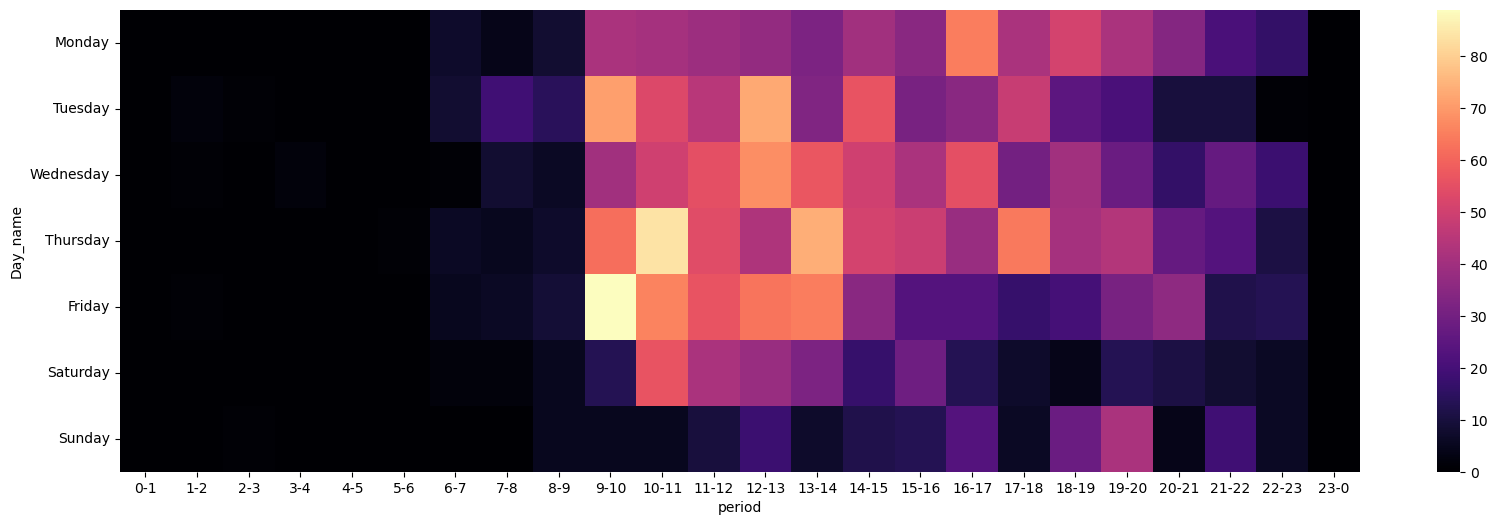

In [82]:
import seaborn as sns

# Define period order for x-axis (hours)
period_order = [f"{i}-{(i+1)%24}" for i in range(24)]
# Define day order for y-axis
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=(20,6))
sns.heatmap(
    df.pivot_table(
        index='Day_name',
        columns='period',
        values='message',
        aggfunc='count'
    ).reindex(index=day_order, columns=period_order).fillna(0), cmap = 'magma'  # Sort columns
)
plt.yticks(rotation='horizontal')
plt.show()

In [83]:
df.pivot_table(
        index='Day_name',
        columns='period',
        values='message',
        aggfunc='count'
    ).fillna(0)

period,00-1,1-2,10-11,11-12,12-13,13-14,14-15,15-16,16-17,17-18,...,20-21,21-22,22-23,23-00,3-4,5-6,6-7,7-8,8-9,9-10
Day_name,,,,,,,,,,,,,,,,,,,,,
Friday,6.0,1.0,66.0,56.0,63.0,65.0,35.0,23.0,23.0,17.0,...,36.0,12.0,13.0,1.0,0.0,0.0,5.0,6.0,9.0,89.0
Monday,0.0,0.0,41.0,39.0,37.0,32.0,40.0,35.0,65.0,42.0,...,34.0,21.0,16.0,8.0,0.0,0.0,7.0,4.0,8.0,42.0
Saturday,1.0,0.0,56.0,42.0,38.0,32.0,17.0,29.0,13.0,7.0,...,11.0,8.0,6.0,2.0,0.0,0.0,2.0,2.0,5.0,13.0
Sunday,4.0,0.0,5.0,10.0,18.0,7.0,12.0,13.0,23.0,6.0,...,4.0,19.0,6.0,0.0,0.0,0.0,0.0,0.0,5.0,5.0
Thursday,0.0,0.0,84.0,54.0,43.0,74.0,51.0,49.0,38.0,64.0,...,27.0,23.0,11.0,6.0,0.0,1.0,6.0,5.0,7.0,62.0
Tuesday,2.0,2.0,53.0,45.0,73.0,33.0,56.0,31.0,35.0,48.0,...,10.0,10.0,1.0,2.0,0.0,0.0,8.0,19.0,14.0,71.0
Wednesday,0.0,1.0,50.0,55.0,68.0,57.0,50.0,42.0,55.0,30.0,...,16.0,27.0,18.0,3.0,2.0,0.0,1.0,8.0,6.0,40.0
